<a href="https://colab.research.google.com/github/muzaqqa/Adept-Internship/blob/main/linear_regression_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


In [6]:
data=pd.read_csv('lungs.csv')
print(data)


      AGE  SMOKING
0      65        1
1      55        1
2      78        2
3      60        2
4      80        1
...   ...      ...
2995   71        2
2996   75        1
2997   62        2
2998   30        1
2999   40        1

[3000 rows x 2 columns]


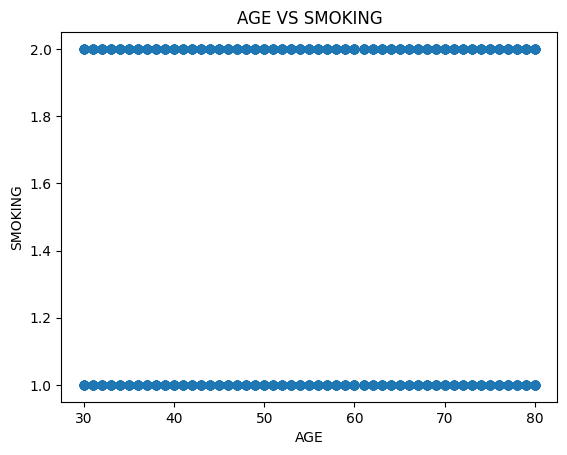

In [7]:
plt.scatter(data.AGE,data.SMOKING)
plt.xlabel('AGE')
plt.ylabel('SMOKING')
plt.title('AGE VS SMOKING')


plt.show()

In [8]:
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].AGE
        y = points.iloc[i].SMOKING
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))





this is the basic loss function it tells us how much we r off from our actual result  we r ot going to actually use it cuz what we r interested in is minimizing the error and thats already included in gradient descent gradient

In [9]:
def gradient_descent(m_now,b_now,points,L):
  m_gradient=0
  b_gradient=0
  n=float(len(points))
  for i in range(n):
    x=points.iloc[i].AGE
    y=points.iloc[i].SMOKING
    m_gradient+=-(2/n)*x*(y-(m_now*x+b_now))
    b_gradient+=-(2/n)*(y-(m_now*x+b_now))
    m=m_now-L*m_gradient
    b=b_now-L*b_gradient
    return m,b




this is the main functional all that we need to do for linear regression basically this is all the mathemtical euquation

Epoch 0: m = 0.016421533333333297, b = 0.00029819999999998936


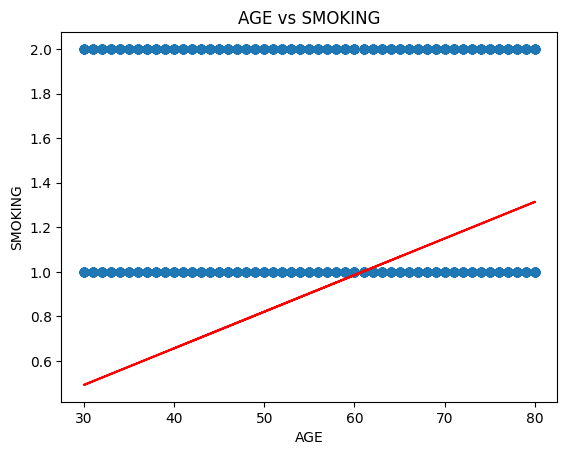

Epoch 100: m = 0.025142433434356664, b = 0.0024765265517901042


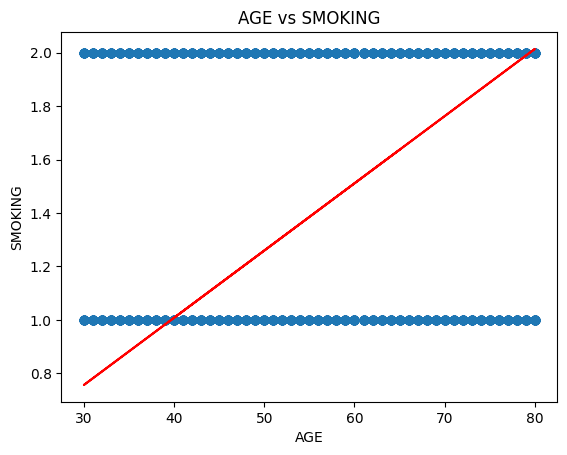

Epoch 200: m = 0.025108125252305505, b = 0.004504003701909837


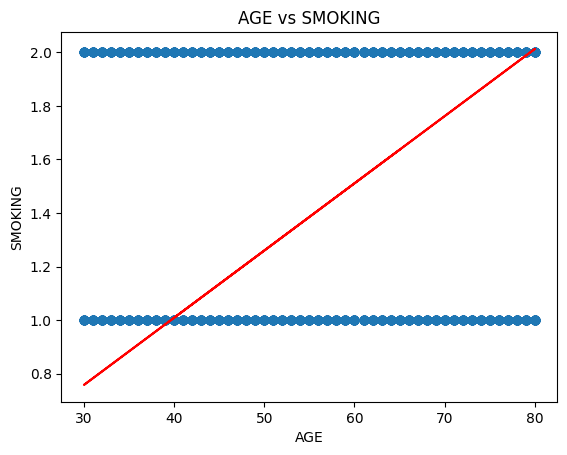

Epoch 300: m = 0.025073862636926885, b = 0.00652878804285514


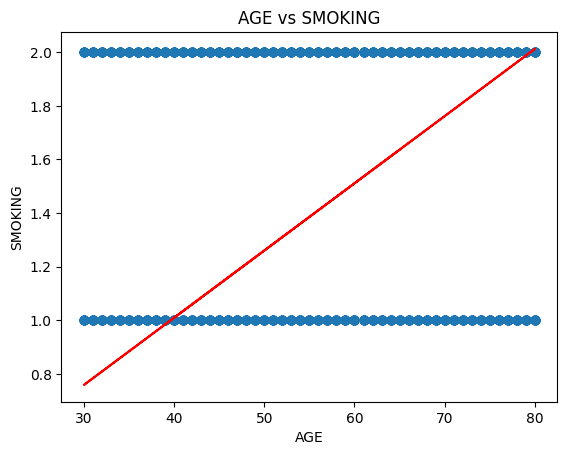

Epoch 400: m = 0.025039645527701087, b = 0.008550883151100967


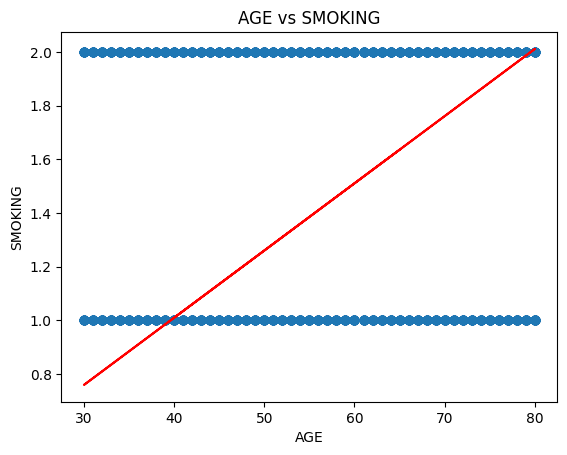

Epoch 500: m = 0.025005473864188766, b = 0.01057029259837216


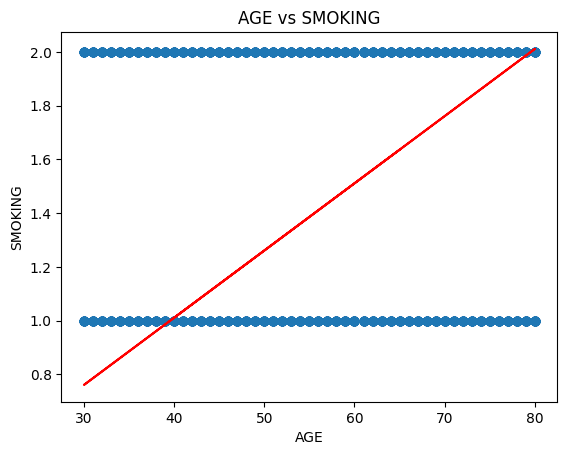

Epoch 600: m = 0.024971347586030854, b = 0.012587019951649719


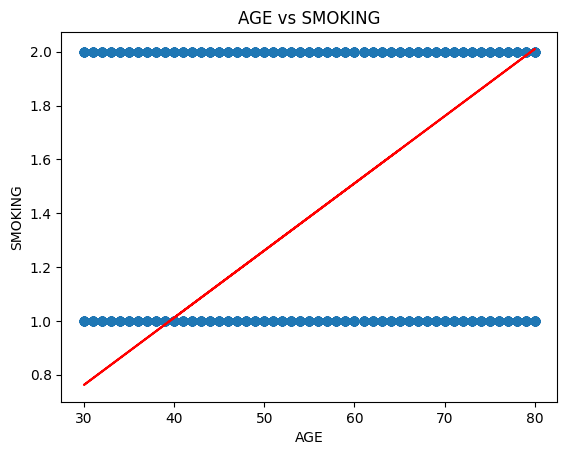

Epoch 700: m = 0.024937266632948447, b = 0.01460106877317716


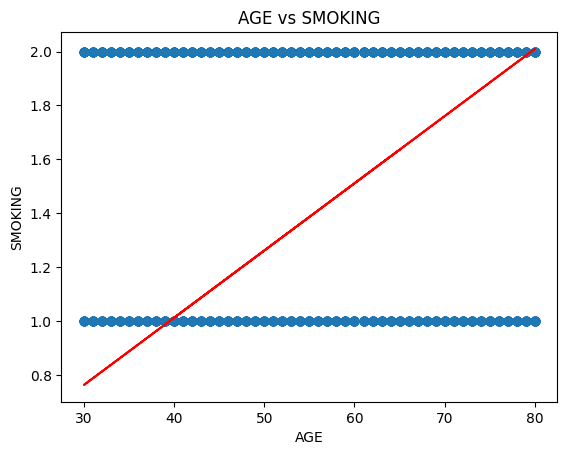

Epoch 800: m = 0.024903230944742696, b = 0.016612442620466752


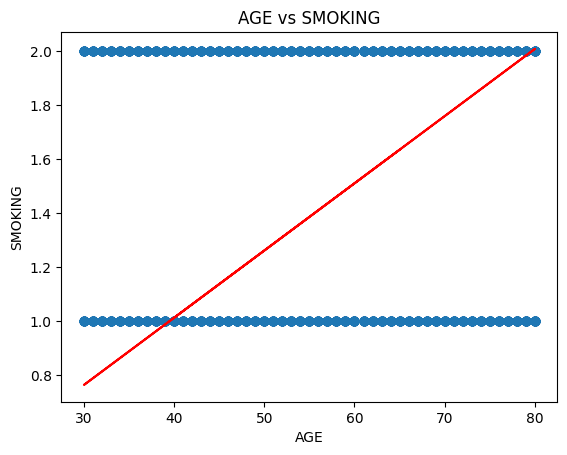

Epoch 900: m = 0.024869240461294722, b = 0.018621145046305878


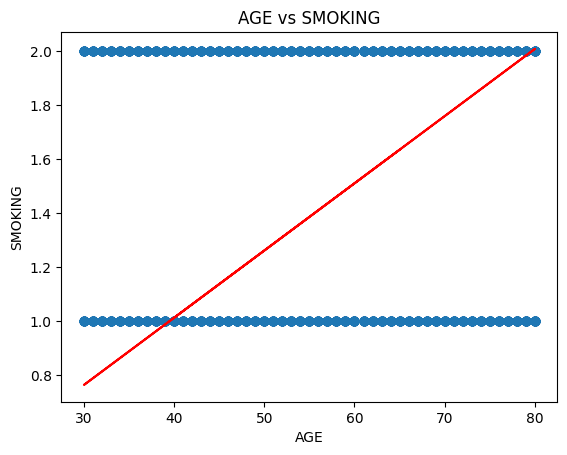

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
m = 0
b = 0
L = 0.0001
epochs = 1000
def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(points))
    for i in range(int(n)):
        x = points.iloc[i].AGE
        y = points.iloc[i].SMOKING
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))
    m_new = m_now - (L * m_gradient)
    b_new = b_now - (L * b_gradient)
    return m_new, b_new
for i in range(epochs):
    m, b = gradient_descent(m, b, data, L)
    if i % 100 == 0:
        print(f"Epoch {i}: m = {m}, b = {b}")

        plt.scatter(data.AGE, data.SMOKING)
        y_pred = m * data.AGE + b
        plt.plot(data.AGE, y_pred, color='red')
        plt.xlabel('AGE')
        plt.ylabel('SMOKING')
        plt.title('AGE vs SMOKING')
        plt.show()


In [11]:
import numpy as np
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    def forward(self, X):
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2
        return self.a2
    def backward(self, X, y, learning_rate):
        m = len(X)
        dZ2 = self.a2 - y
        dW2 = np.dot(self.a1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.sigmoid_derivative(self.a1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                mse = np.mean((y_pred - y) ** 2)
                print(f"Epoch {epoch}, MSE: {mse}")

    def predict(self, X):

        return self.forward(X)


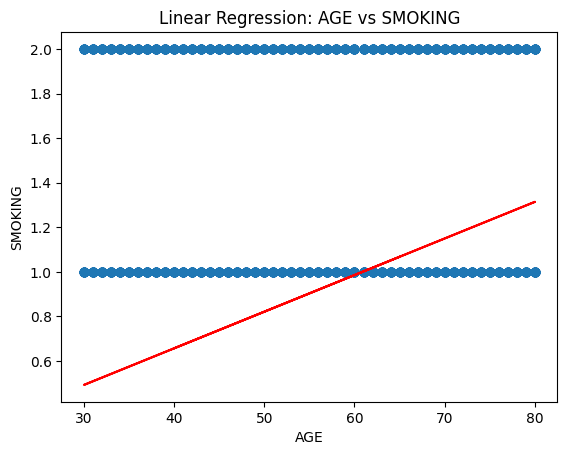

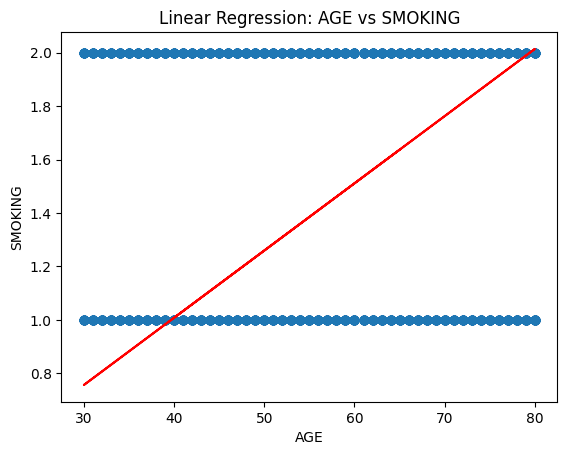

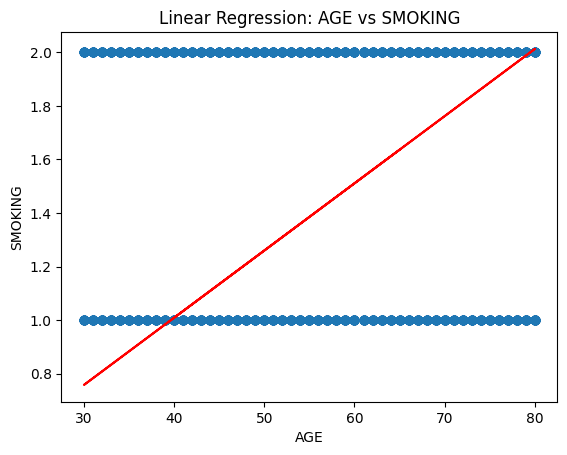

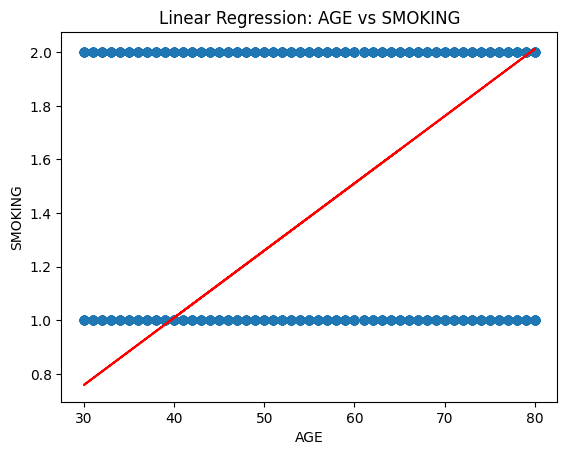

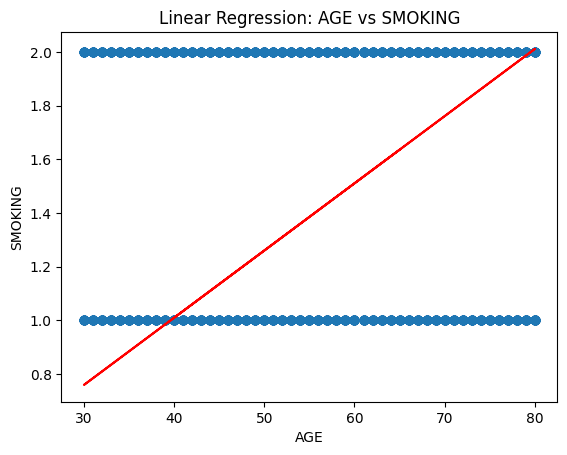

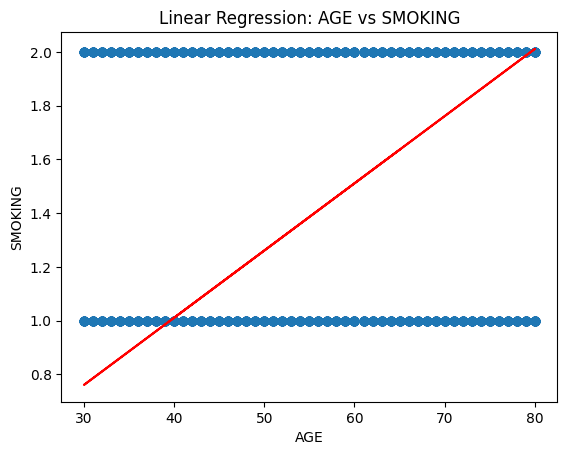

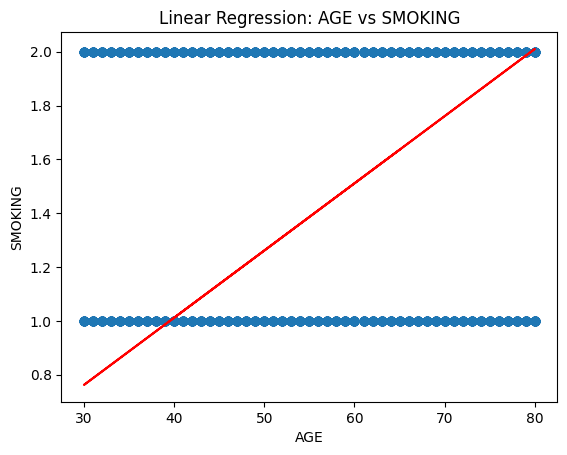

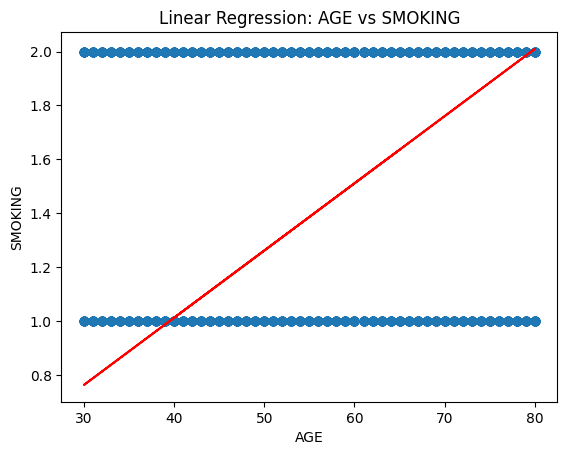

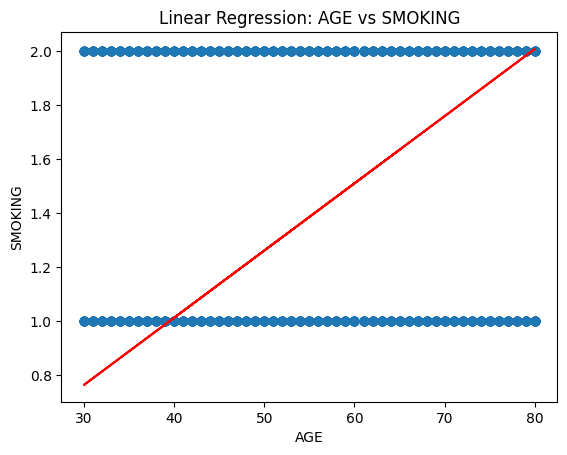

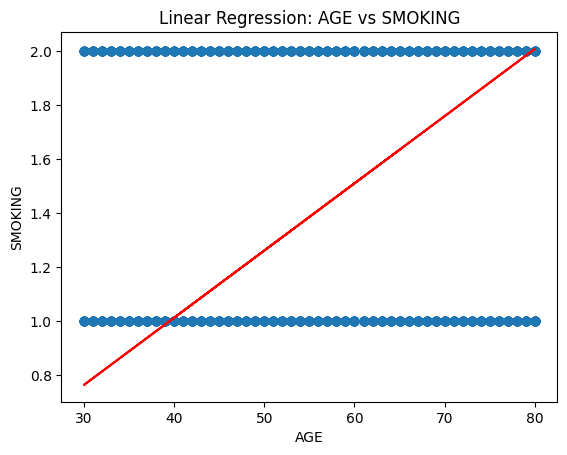

MSE (Linear Regression): 0.4010553321123406
Epoch 0, MSE: 8.290483199688293
Epoch 100, MSE: 0.07777073653365864
Epoch 200, MSE: 0.07475233552435935
Epoch 300, MSE: 0.07417048300588379
Epoch 400, MSE: 0.07361844455505284
Epoch 500, MSE: 0.07309385596643893
Epoch 600, MSE: 0.0725952200895524
Epoch 700, MSE: 0.07212113304234229
Epoch 800, MSE: 0.07167027726594409
Epoch 900, MSE: 0.07124141535201156


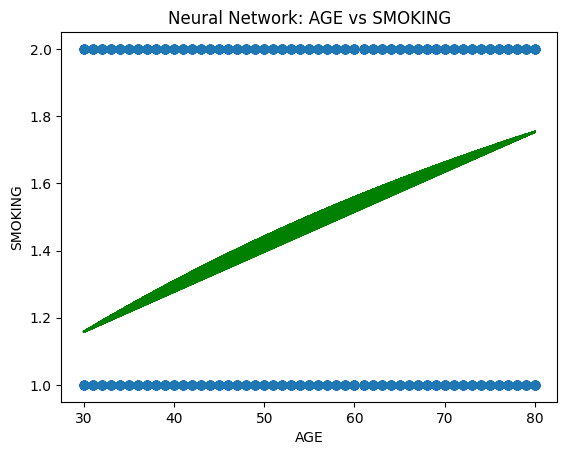

MSE (Neural Network): 0.28027403663165323


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('lungs.csv')
def loss_function(m, b, points):
    total_error = 0
    for i in range(len(points)):
        x = points.iloc[i].AGE
        y = points.iloc[i].SMOKING
        total_error += (y - (m * x + b)) ** 2
    return total_error / float(len(points))

def gradient_descent(m_now, b_now, points, L):
    m_gradient = 0
    b_gradient = 0
    n = float(len(points))
    for i in range(int(n)):
        x = points.iloc[i].AGE
        y = points.iloc[i].SMOKING
        m_gradient += -(2/n) * x * (y - ((m_now * x) + b_now))
        b_gradient += -(2/n) * (y - ((m_now * x) + b_now))
    m_new = m_now - (L * m_gradient)
    b_new = b_now - (L * b_gradient)
    return m_new, b_new
m_lr = 0
b_lr = 0
L_lr = 0.0001
epochs_lr = 1000
for i in range(epochs_lr):
    m_lr, b_lr = gradient_descent(m_lr, b_lr, data, L_lr)
    if i % 100 == 0:
        plt.scatter(data.AGE, data.SMOKING)
        y_pred_lr = m_lr * data.AGE + b_lr
        plt.plot(data.AGE, y_pred_lr, color='red')
        plt.xlabel('AGE')
        plt.ylabel('SMOKING')
        plt.title('Linear Regression: AGE vs SMOKING')
        plt.show()
mse_lr = loss_function(m_lr, b_lr, data)
print(f"MSE (Linear Regression): {mse_lr}")
X_nn = data.AGE.values.reshape(-1, 1) / np.max(data.AGE)
y_nn = data.SMOKING.values.reshape(-1, 1) / np.max(data.SMOKING)
input_size = X_nn.shape[1]
hidden_size = 10
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)
epochs_nn = 1000
learning_rate_nn = 0.01
nn.train(X_nn, y_nn, epochs_nn, learning_rate_nn)
y_pred_nn = nn.predict(X_nn) * np.max(data.SMOKING)
plt.scatter(data.AGE, data.SMOKING)
plt.plot(data.AGE, y_pred_nn, color='green')
plt.xlabel('AGE')
plt.ylabel('SMOKING')
plt.title('Neural Network: AGE vs SMOKING')
plt.show()
mse_nn = np.mean((y_pred_nn - data.SMOKING.values) ** 2)
print(f"MSE (Neural Network): {mse_nn}")
